In [1]:
from numpy.random import binomial
from numpy.random import randint
from numpy.random import sample
import matplotlib.pyplot as plt

In [2]:
def WF_simulation(start_freq, pop_size, selection = 0):
    freq = start_freq
    count = start_freq*2*pop_size
    freq_list = [start_freq]
    
    while 0 < freq < 1:
        count = binomial(2*pop_size, 
                         (count*(1+selection))/
                         (2*pop_size-count+count*(1+selection))
                        )
        freq = count/(2*pop_size)
        freq_list.append(freq)
    freq_list.append(freq)
    
    return freq_list

In [3]:
def WF_plot(freq_list, start_freq, pop_size, selection):
    fig, ax = plt.subplots()
    ax.plot(range(len(freq_list)), freq_list,
           label = "p={}, N={}, s={}".format(start_freq, pop_size, selection)
           )
    
    ax.set_title("Allele frequency v. generation")
    ax.set_ylabel("Allele frequency")
    ax.set_xlabel("Generation")
    ax.legend()
    
    plt.show()

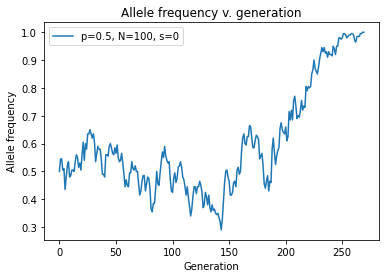

In [4]:
WF_plot(WF_simulation(0.5, 100), 0.5, 100, 0)

In [5]:
fixation_hist = []

for trial in range(1000):
    freq_list = WF_simulation(0.5, 100)
    fixation_hist.append(len(freq_list)-1)

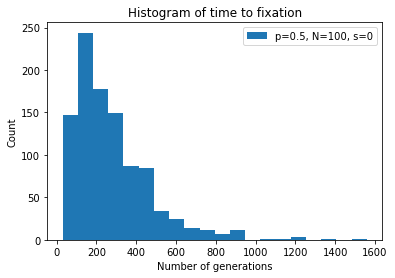

In [6]:
fig, ax = plt.subplots()
ax.hist(fixation_hist, bins = 20, label = "p=0.5, N=100, s=0")

ax.set_title("Histogram of time to fixation")
ax.set_ylabel("Count")
ax.set_xlabel("Number of generations")
ax.legend()

plt.show()

In [7]:
pop_sizes = []
fixation_times = []

for trial in range(1000):
    pop_size = randint(100, 100000)
    pop_sizes.append(pop_size)
        
    freq_list = WF_simulation(0.5, pop_size)
    fixation_times.append(len(freq_list)-1)

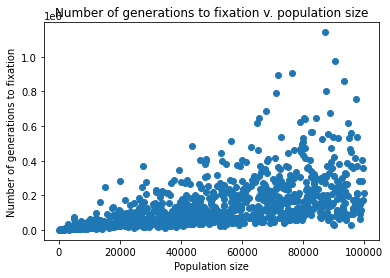

In [8]:
fig, ax = plt.subplots()
ax.scatter(pop_sizes, fixation_times, label = "p=0.5, s=0")

ax.set_title("Number of generations to fixation v. population size")
ax.set_xlabel("Population size")
ax.set_ylabel("Number of generations to fixation")

plt.show()

In [14]:
starting_freqs = []
fixation_times = []

for trial in range(1000):
    starting_freq = sample()
    freq_list = WF_simulation(starting_freq, 100)
    
    starting_freqs.append(starting_freq)
    fixation_times.append(len(freq_list)-1)

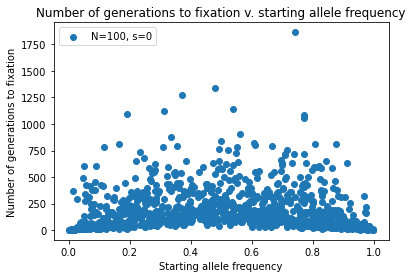

In [15]:
fig, ax = plt.subplots()
ax.scatter(starting_freqs, fixation_times, label="N=100, s=0")

ax.set_title("Number of generations to fixation v. starting allele frequency")
ax.set_xlabel("Starting allele frequency")
ax.set_ylabel("Number of generations to fixation")
ax.legend()

plt.show()

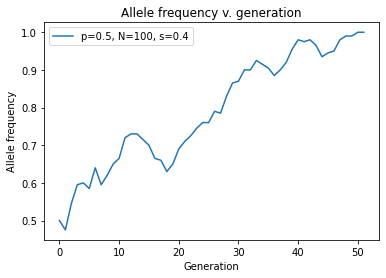

In [16]:
WF_plot(WF_simulation(0.5, 100, 0.1), 0.5, 100, 0.4)

In [17]:
selection_coeffs = []
fixation_times = []

for trial in range(1000):
    selection = sample()
    freq_list = WF_simulation(0.5, 100, selection)
    
    selection_coeffs.append(selection)
    fixation_times.append(len(freq_list)-1)

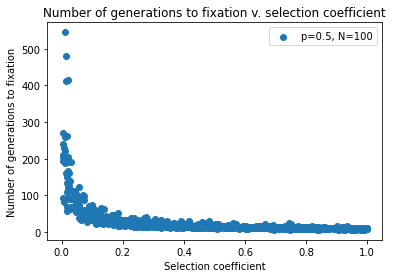

In [18]:
fig, ax = plt.subplots()
ax.scatter(selection_coeffs, fixation_times,
          label = "p=0.5, N=100")

ax.set_title("Number of generations to fixation v. selection coefficient")
ax.set_ylabel("Number of generations to fixation")
ax.set_xlabel("Selection coefficient")
ax.legend()

plt.show()